In [1]:
##set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
!pip install tensorflow


  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.1.24-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.70.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using 

In [14]:
###importing dependecies
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
!pip install kaggle

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     -------------- ----------------------- 30.7/82.7 kB 262.6 kB/s eta 0:00:01
     -------------------------------------  81.9/82.7 kB 651.6 kB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 513.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105795 sha256=d3a0018a6717589b533d6320110fe4fccbb86cc3b3d7f2c7afde989abc282443
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle


In [3]:
kaggle_credentials=json.load(open("kaggle.json"))

In [4]:
###set up kaggle api as environmental variables
os.environ['KAGGLE_USERNAME']=kaggle_credentials["username"]
os.environ['KAGGLE_KEY']=kaggle_credentials["key"]

In [5]:
!kaggle datasets download -d abdallahalidev/PlantVillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/PlantVillage-dataset
License(s): CC-BY-NC-SA-4.0
PlantVillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
##unzip  downloaded dataset
with ZipFile("PlantVillage-dataset.zip",'r') as zip_ref:
     zip_ref.extractall()


In [3]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])


print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])



print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


In [4]:

print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


In [5]:
###dataset preprocessing
base_dir='plantvillage dataset/color'

(256, 256, 3)


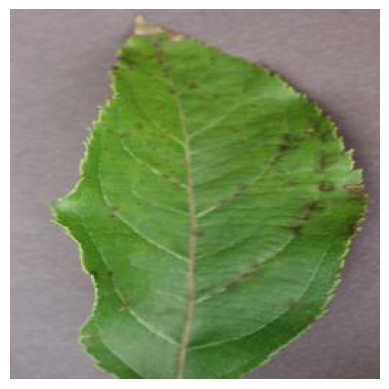

In [6]:
image_path = 'C:/Users/Acer/Plant_prediction/plantvillage dataset/color/Apple___Apple_scab/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417.JPG'

##read image
img = mpimg.imread(image_path)
print(img.shape)

##display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
print(img)

[[[160 148 152]
  [161 149 153]
  [161 149 153]
  ...
  [145 129 130]
  [142 126 127]
  [140 124 125]]

 [[160 148 152]
  [160 148 152]
  [160 148 152]
  ...
  [141 125 126]
  [139 123 124]
  [138 122 123]]

 [[162 150 154]
  [161 149 153]
  [160 148 152]
  ...
  [141 125 126]
  [142 126 127]
  [142 126 127]]

 ...

 [[151 144 151]
  [150 143 150]
  [148 141 148]
  ...
  [ 94  84  83]
  [ 92  82  81]
  [ 92  82  81]]

 [[148 141 148]
  [147 140 147]
  [147 140 147]
  ...
  [ 93  83  82]
  [ 92  82  81]
  [ 91  81  80]]

 [[144 137 144]
  [144 137 144]
  [145 138 145]
  ...
  [ 93  83  82]
  [ 92  82  81]
  [ 91  81  80]]]


In [8]:
##image generators
img_size=224
batch_size=32

In [9]:
##image data generators
data_gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
##use 20% of data for validation


###train Generator
train_generator=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)


##validation Generator
validation_generator=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)


Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [10]:
##model definition
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size,img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))

C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Stop when validation loss stops improving
    patience=2,          # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore model weights from the best epoch
)

###training the model
history=model.fit(train_generator,
                  steps_per_epoch=train_generator.samples//batch_size,
                  epochs=5,
                  validation_data=validation_generator,
                  validation_steps=validation_generator.samples//batch_size,
                  callbacks=[early_stopping]
                  
)

C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 634s 464ms/step - accuracy: 0.6084 - loss: 1.5788 - val_accuracy: 0.8461 - val_loss: 0.4839
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 616s 453ms/step - accuracy: 0.9227 - loss: 0.2471 - val_accuracy: 0.8607 - val_loss: 0.4597
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 624s 459ms/step - accuracy: 0.9656 - loss: 0.1074 - val_accuracy: 0.8608 - val_loss: 0.5319
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 627s 462ms/step - accuracy: 0.9807 - loss: 0.0609 - val_accuracy: 0.8865 - val_loss: 0.4527
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 631s 465ms/step - accuracy: 0.9827 - loss: 0.0544 - val_accuracy: 0.8759 - val_loss: 0.5848


In [32]:
# Model Evaluation
## batch size refers to the number of training samples processed by the model in one forward and backward pass during training. 
##It is an essential hyperparameter in machine learning, especially in deep learning, and it determines how many samples are 
##loaded and processed at a time.
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 90s 265ms/step - accuracy: 0.8884 - loss: 0.4381
Validation Accuracy: 88.66%


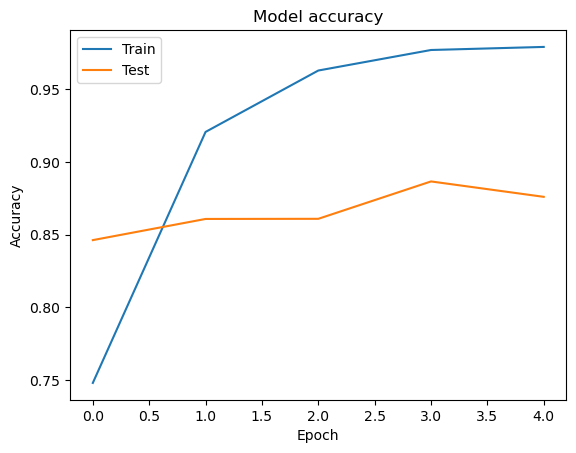

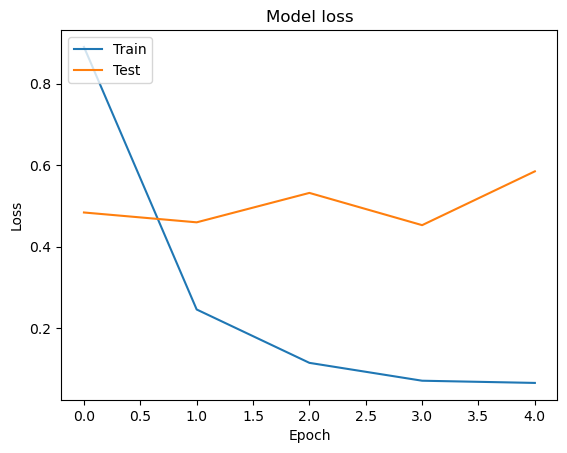

In [33]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [34]:
##function to load and preprocess image using pillow
def load_and_preprocess_image(image_path,target_size=(224,224)):
    ##load image
    img=Image.open(image_path)
    ##resize image
    img=img.resize(target_size)
    ##convert image to a numpy array
    img_array=np.array(img)
    ##add batch dimension
    img_array=np.expand_dims(img_array,axis=0)
    ###scale image values to[0,1]
    
    img_array=img_array.astype('float32')/255
    return img_array

In [35]:
## batch size refers to the number of training samples processed by the model in one forward and backward pass during training. It is an essential hyperparameter in machine learning, especially in deep learning, 
##and it determines how many samples are loaded and processed at a time.
# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [36]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [31]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [26]:
##saving classnames as json file
json.dump(class_indices,open('class_indices.json','w'))

In [37]:

im='C:/Users/Acer/Plant_prediction/plantvillage dataset/color/Apple___Apple_scab/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417.JPG'
predicted_class_name=predict_image_class(model,im,class_indices)

#output result
print("Predicted class name:",predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted class name: Apple___Apple_scab


In [38]:
import os

# Ensure the folder exists
os.makedirs(r"C:\Users\Acer\Plant_prediction\models", exist_ok=True)

# Save model in HDF5 format
model.save(r"C:\Users\Acer\Plant_prediction\models\plant_model.h5")

